## 2.2 在迷宮隨機摸索路線

In [10]:
# 宣告使用的套件
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


C:\Users\baris\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


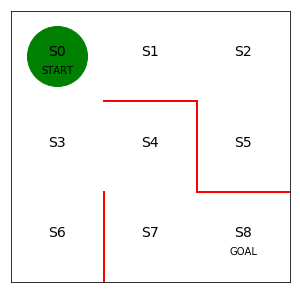

In [11]:
# 迷宮的初始狀態

# 宣告圖的大小與圖的變數名稱
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# 繪製紅色牆壁
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# 繪製代表狀態的文字S0～S8
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 設定繪圖範圍與塗銷刻度
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')

# 於目前位置S0繪製綠色圓形
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

In [6]:
# 設定一開始採用何種策略的參數theta_0

# 列為狀態0～7、欄移動方向的↑、→、↓、←
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # s0
                    [np.nan, 1, np.nan, 1],  # s1
                    [np.nan, np.nan, 1, 1],  # s2
                    [1, 1, 1, np.nan],  # s3
                    [np.nan, np.nan, 1, 1],  # s4
                    [1, np.nan, np.nan, np.nan],  # s5
                    [1, np.nan, np.nan, np.nan],  # s6
                    [1, 1, np.nan, np.nan],  # s7、※s8是終點，所以不需採用任何策略
                    ])

In [7]:
# 自訂策略的參數theta轉換成行動策略pi的函數


def simple_convert_into_pi_from_theta(theta):
    '''單純地計算比例'''

    [m, n] = theta.shape  # 取得theta的矩陣大小
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])  # 計算比例

    pi = np.nan_to_num(pi)  # 將nan轉換成0

    return pi


In [5]:
# 算出初始策略pi_0
pi_0 = simple_convert_into_pi_from_theta(theta_0)


In [8]:
# 顯示初始策略pi_0
pi_0

NameError: name 'pi_0' is not defined

In [7]:
# 自訂計算1step移動後的狀態s的函數


def get_next_s(pi, s):
    direction = ["up", "right", "down", "left"]

    next_direction = np.random.choice(direction, p=pi[s, :])
    # 根據pi[s,:]的機率、選定direction

    if next_direction == "up":
        s_next = s - 3  # 往上移動時，讓代表狀態的數字減少3
    elif next_direction == "right":
        s_next = s + 1  # 往右移動時，讓代表狀態的數字加1
    elif next_direction == "down":
        s_next = s + 3  # 往下移動時，讓代表狀態的數字加3
    elif next_direction == "left":
        s_next = s - 1  # 往左移動時，讓代表狀態的數字減1

    return s_next


In [8]:
# 自訂代理器在迷宮之內不斷移動，直到抵達終點為止的函數


def goal_maze(pi):
    s = 0  # 起點
    state_history = [0]  # 記錄代理器移動軌跡的list

    while (1):  # 持續移動，直到抵達終點的迴圈
        next_s = get_next_s(pi, s)
        state_history.append(next_s)  # 在記錄list追加下一個狀態（代理器的位置）

        if next_s == 8:  # 若抵達終點就結束程式
            break
        else:
            s = next_s

    return state_history


In [9]:
# 在迷宮內部往終點移動
state_history = goal_maze(pi_0)


In [9]:
print(state_history)
print("走出迷宮的總步數為" + str(len(state_history) - 1) + "喲")


NameError: name 'state_history' is not defined

In [12]:
# 將代理器移動軌跡畫成動畫
# 参考URL http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
from matplotlib import animation
from IPython.display import HTML


def init():
    '''初始化背景影像'''
    line.set_data([], [])
    return (line,)


def animate(i):
    '''每一個的繪圖內容'''
    state = state_history[i]  # 繪製目前的位置
    x = (state % 3) + 0.5  # 狀態的x座標以3除之，再於得到的餘數+0.5
    y = 2.5 - int(state / 3)  # y座標以3除之，再以2.5減去商數
    line.set_data(x, y)
    return (line,)


#　利用初始化函數與每格影格的繪圖函數繪製動畫
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    state_history), interval=200, repeat=False)

HTML(anim.to_jshtml())


NameError: name 'state_history' is not defined